<a href="https://colab.research.google.com/github/wjcorre/proyectoprediccion/blob/main/proyectoGrupal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#UNIVERSIDAD TECNICA DEL NORTE 

#**Grupo2**
**Integrantes::**


*   William Puma
*   Anderson Davila
*   Juan De la Cruz
*   Wesly Correa



> Importamos las librerias de python necesarias



In [444]:
import numpy as np
import pandas as pd
import keras as ke
import matplotlib.pyplot as plt


>Llamamos al documento en excel a tratar

In [445]:
datosentrada = pd.read_excel('/content/drive/MyDrive/Proyecto/historico iba_ota_cota_pim_urc.xlsx')

>Filtrado de datos a estudiar

In [446]:
datos_requeridos= ['FECHA','iba_conf']

In [447]:
entrenamiento= datosentrada[datos_requeridos]

In [448]:
entrenamiento

,FECHA,iba_conf
0,2020-04-01,13
1,2020-04-02,14
2,2020-04-03,16
3,2020-04-04,17
4,2020-04-05,18
...,...,...
353,2021-03-20,4652
354,2021-03-21,4658
355,2021-03-22,4663
356,2021-03-23,4666


In [449]:
entrenamiento.tail()

,FECHA,iba_conf
353,2021-03-20,4652
354,2021-03-21,4658
355,2021-03-22,4663
356,2021-03-23,4666
357,2021-03-24,4757


>Convertimos en un array la columna iba_conf 

In [450]:
procesado = entrenamiento.iloc[:, 1:2].values

In [451]:
procesado

array([[  13],
       [  14],
       [  16],
       [  17],
       [  18],
       [  19],
       [  19],
       [  19],
       [  20],
       [  20],
       [  25],
       [  26],
       [  26],
       [  26],
       [  27],
       [  27],
       [  34],
       [  34],
       [  37],
       [  37],
       [  37],
       [  37],
       [  39],
       [  39],
       [  39],
       [  39],
       [  39],
       [  39],
       [  50],
       [  53],
       [  61],
       [  61],
       [  62],
       [  61],
       [  61],
       [  63],
       [  65],
       [  72],
       [  72],
       [  73],
       [  73],
       [  79],
       [  79],
       [  79],
       [  82],
       [  82],
       [  82],
       [  83],
       [  89],
       [  92],
       [  95],
       [  95],
       [  96],
       [  97],
       [  99],
       [ 101],
       [ 101],
       [ 102],
       [ 102],
       [ 102],
       [ 103],
       [ 115],
       [ 116],
       [ 120],
       [ 124],
       [ 124],
       [ 1

>Determina una escala para el procesamiento

In [452]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

entrenamientoescala = scaler.fit_transform(procesado)

>Da las pautas de optimización de la entrada de datos, es decir los datos de entrenamiento

In [453]:
features_set = []
labels = []
for i in range(60, 200):
    features_set.append(entrenamientoescala[i-60:i, 0])
    labels.append(entrenamientoescala[i, 0])

> Agrego caracteristicas anteriores, al nuevo array de los datos de entrada 

In [454]:
features_set, labels = np.array(features_set), np.array(labels)

>Otorgamos una nueva forma a la matriz

In [455]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

> Importamos keras para levantar la red neuronal a partir de los datos obtenidos

In [456]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

> **Iniciamos la red**

In [457]:
model = Sequential()

> Creamos nuestro modelo de analisis

In [458]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

> Asignamos un punto de fallo

In [459]:
model.add(Dropout(0.2))

> Agregamos neuronas a la red

In [460]:
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

> Le otorgamos el punto de falla error a la red, es decir el final de la red

In [461]:
model.add(Dense(units = 1))

> Designamos el compilador con el cual se va a tratar la red

In [462]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

> Creamos el aprendizaje de la red neuronal

In [463]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 [==============================] - 7s 100ms/step - loss: 0.0482
Epoch 2/100
5/5 [==============================] - 1s 109ms/step - loss: 0.0143
Epoch 3/100
5/5 [==============================] - 1s 105ms/step - loss: 0.0075
Epoch 4/100
5/5 [==============================] - 1s 113ms/step - loss: 0.0040
Epoch 5/100
5/5 [==============================] - 1s 109ms/step - loss: 0.0030
Epoch 6/100
5/5 [==============================] - 1s 109ms/step - loss: 0.0022
Epoch 7/100
5/5 [==============================] - 1s 110ms/step - loss: 0.0017
Epoch 8/100
5/5 [==============================] - 1s 105ms/step - loss: 0.0017
Epoch 9/100
5/5 [==============================] - 1s 107ms/step - loss: 0.0013
Epoch 10/100
5/5 [==============================] - 1s 104ms/step - loss: 0.0011
Epoch 11/100
5/5 [==============================] - 1s 104ms/step - loss: 0.0012
Epoch 12/100
5/5 [==============================] - 1s 105ms/step - loss: 0.0010
Epoch 13/100
5/5 [===================

> Llamamos al dataset de prueba para comprobar la red
y con el metodo iloc convertimos en un array los datos que se encuentran en la columna "iba_conf"

In [464]:
datostest = pd.read_excel('/content/drive/MyDrive/Proyecto/historico iba_ota_cota_pim_urc.xlsx')
datostestgraficar = datostest.iloc[:, 1:2].values

>Mostramos el tipo de dato que nos devuelve en este caso "datostestgraficar" 

In [465]:
type(datostestgraficar)

numpy.ndarray

In [466]:
datostestgraficar

array([[  13],
       [  14],
       [  16],
       [  17],
       [  18],
       [  19],
       [  19],
       [  19],
       [  20],
       [  20],
       [  25],
       [  26],
       [  26],
       [  26],
       [  27],
       [  27],
       [  34],
       [  34],
       [  37],
       [  37],
       [  37],
       [  37],
       [  39],
       [  39],
       [  39],
       [  39],
       [  39],
       [  39],
       [  50],
       [  53],
       [  61],
       [  61],
       [  62],
       [  61],
       [  61],
       [  63],
       [  65],
       [  72],
       [  72],
       [  73],
       [  73],
       [  79],
       [  79],
       [  79],
       [  82],
       [  82],
       [  82],
       [  83],
       [  89],
       [  92],
       [  95],
       [  95],
       [  96],
       [  97],
       [  99],
       [ 101],
       [ 101],
       [ 102],
       [ 102],
       [ 102],
       [ 103],
       [ 115],
       [ 116],
       [ 120],
       [ 124],
       [ 124],
       [ 1

> Pintamos por pantalla las predicciones de acuerdo al dataset

In [467]:
type(datostest["FECHA"])

pandas.core.series.Series

In [468]:
datostestfecha = datostest.iloc[:, 0:1].values

In [469]:
datostestfecha

array([['2020-04-01T00:00:00.000000000'],
       ['2020-04-02T00:00:00.000000000'],
       ['2020-04-03T00:00:00.000000000'],
       ['2020-04-04T00:00:00.000000000'],
       ['2020-04-05T00:00:00.000000000'],
       ['2020-04-06T00:00:00.000000000'],
       ['2020-04-07T00:00:00.000000000'],
       ['2020-04-08T00:00:00.000000000'],
       ['2020-04-09T00:00:00.000000000'],
       ['2020-04-10T00:00:00.000000000'],
       ['2020-04-11T00:00:00.000000000'],
       ['2020-04-12T00:00:00.000000000'],
       ['2020-04-13T00:00:00.000000000'],
       ['2020-04-14T00:00:00.000000000'],
       ['2020-04-15T00:00:00.000000000'],
       ['2020-04-16T00:00:00.000000000'],
       ['2020-04-17T00:00:00.000000000'],
       ['2020-04-18T00:00:00.000000000'],
       ['2020-04-19T00:00:00.000000000'],
       ['2020-04-20T00:00:00.000000000'],
       ['2020-04-21T00:00:00.000000000'],
       ['2020-04-22T00:00:00.000000000'],
       ['2020-04-23T00:00:00.000000000'],
       ['2020-04-24T00:00:00.00000

In [470]:
datos_otavalo= datosentrada.iloc[:, 2:3].values

In [471]:
datos_otavalo

array([[   1],
       [   1],
       [   1],
       [   2],
       [   1],
       [   1],
       [   1],
       [   1],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   3],
       [   4],
       [   4],
       [   5],
       [   6],
       [   6],
       [   6],
       [   9],
       [   9],
       [   9],
       [   9],
       [   9],
       [   9],
       [  15],
       [  18],
       [  18],
       [  18],
       [  18],
       [  19],
       [  19],
       [  22],
       [  24],
       [  23],
       [  23],
       [  29],
       [  29],
       [  31],
       [  31],
       [  31],
       [  33],
       [  34],
       [  35],
       [  35],
       [  39],
       [  39],
       [  41],
       [  44],
       [  49],
       [  49],
       [  52],
       [  53],
       [  54],
       [  55],
       [  55],
       [  55],
       [  55],
       [  56],
       [  56],
       [  56],
       [  56],
       [  56],
       [  

In [472]:
datos_cotacachi= datosentrada.iloc[:, 3:4].values

In [473]:
datos_cotacachi

array([[   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   0],
       [   1],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   2],
       [   4],
       [   4],
       [   4],
       [   4],
       [   4],
       [   4],
       [   6],
       [   6],
       [   6],
       [   7],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   6],
       [   7],
       [   7],
       [   8],
       [   8],
       [   8],
       [   8],
       [   8],
       [  11],
       [  11],
       [  11],
       [  11],
       [  11],
       [  11],
       [  11],
       [  11],
       [  11],
       [  11],
       [  12],
       [  12],
       [  12],
       [  12],
       [  

In [474]:
datos_atun= datosentrada.iloc[:, 4:5].values

In [475]:
datos_atun

array([[   1],
       [   1],
       [   1],
       [   1],
       [   1],
       [   1],
       [   1],
       [   1],
       [   1],
       [   3],
       [   3],
       [   3],
       [   3],
       [   3],
       [   3],
       [   3],
       [   3],
       [   3],
       [   3],
       [   4],
       [   5],
       [   5],
       [   5],
       [   5],
       [   5],
       [   5],
       [   5],
       [   5],
       [   6],
       [   7],
       [   8],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   7],
       [   8],
       [   8],
       [   8],
       [   8],
       [   8],
       [   8],
       [   8],
       [   8],
       [   9],
       [   9],
       [   9],
       [   9],
       [  10],
       [  10],
       [  10],
       [  10],
       [  11],
       [  11],
       [  11],
       [  11],
       [  11],
       [  

In [476]:
datos_pimampiro= datosentrada.iloc[:, 5:6].values

In [477]:
datos_urcuqui

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  1],
       [  1],
       [  1],
       [  2],
       [  5],
       [  5],
       [  5],
       [  5],
       [  5],
       [  5],
      

In [478]:
datos_urcuqui= datosentrada.iloc[:, 6:7].values

In [479]:
datos_urcuqui

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  1],
       [  1],
       [  1],
       [  2],
       [  5],
       [  5],
       [  5],
       [  5],
       [  5],
       [  5],
      

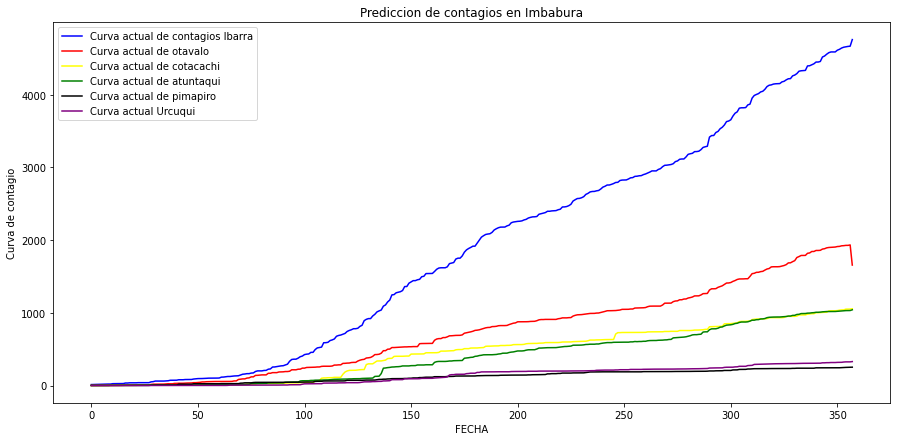

In [493]:
plt.figure(figsize=(15,7))
plt.plot(datostestgraficar, color='blue', label='Curva actual de contagios Ibarra')
plt.plot(datos_otavalo, color='red', label='Curva actual de otavalo')
plt.plot(datos_cotacachi, color='yellow', label='Curva actual de cotacachi')
plt.plot(datos_atun, color='green', label='Curva actual de atuntaqui')
plt.plot(datos_pimampiro, color='black', label="Curva actual de pimapiro")
plt.plot(datos_urcuqui, color="purple", label="Curva actual Urcuqui")

#plt.plot(datostestfecha, color='red', label='Comparacion fecha')
plt.title('Prediccion de contagios en Imbabura')
plt.xlabel('FECHA')
plt.ylabel('Curva de contagio')
plt.legend()
plt.show()

In [481]:
resultado = pd.concat((datosentrada['iba_conf'], datostest['iba_conf']), axis=0)

>resultado de la union del campo "iba_conf"

In [482]:
resultado

0        13
1        14
2        16
3        17
4        18
       ... 
353    4652
354    4658
355    4663
356    4666
357    4757
Name: iba_conf, Length: 716, dtype: int64

In [483]:
test_inputs = resultado[len(resultado) - len(datostest) - 60:].values

In [484]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

In [485]:
test_features = []
for i in range(60, 359):
    test_features.append(test_inputs[i-60:i, 0])

In [486]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

>Datos que deseamos predecir

In [487]:
test_features

array([[[7.62225970e-01],
        [7.63912310e-01],
        [7.67495784e-01],
        ...,
        [9.80185497e-01],
        [9.80817875e-01],
        [1.00000000e+00]],

       [[7.63912310e-01],
        [7.67495784e-01],
        [7.78246206e-01],
        ...,
        [9.80817875e-01],
        [1.00000000e+00],
        [0.00000000e+00]],

       [[7.67495784e-01],
        [7.78246206e-01],
        [7.86467116e-01],
        ...,
        [1.00000000e+00],
        [0.00000000e+00],
        [2.10792580e-04]],

       ...,

       [[5.59865093e-01],
        [5.61551433e-01],
        [5.62605396e-01],
        ...,
        [7.30607083e-01],
        [7.33768971e-01],
        [7.41568297e-01]],

       [[5.61551433e-01],
        [5.62605396e-01],
        [5.66821248e-01],
        ...,
        [7.33768971e-01],
        [7.41568297e-01],
        [7.45784148e-01]],

       [[5.62605396e-01],
        [5.66821248e-01],
        [5.72301855e-01],
        ...,
        [7.41568297e-01],
        [7.4578

In [488]:
predictiones = model.predict(test_features)

In [489]:
predictiones = scaler.inverse_transform(predictiones)

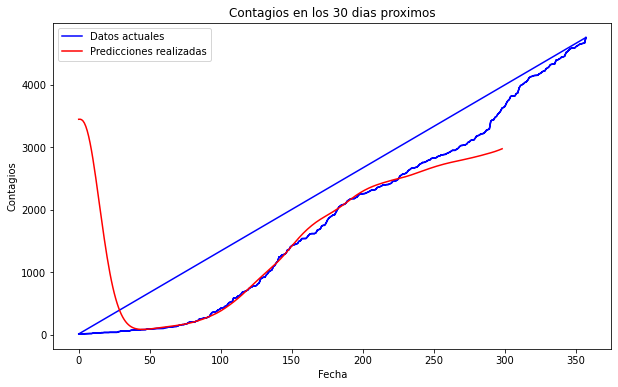

In [490]:
plt.figure(figsize=(10,6))
plt.plot(resultado, color='blue', label='Datos actuales')
plt.plot(predictiones , color='red', label='Predicciones realizadas')
plt.title('Contagios en los 30 dias proximos')
plt.xlabel('Fecha')
plt.ylabel('Contagios')
plt.legend()
plt.show()